<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-and-Preparation" data-toc-modified-id="Introduction-and-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction and Preparation</a></span><ul class="toc-item"><li><span><a href="#Introduction-of-the-whole-and-navigation-above" data-toc-modified-id="Introduction-of-the-whole-and-navigation-above-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction of the whole and navigation above</a></span></li><li><span><a href="#Usual-preparation" data-toc-modified-id="Usual-preparation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Usual preparation</a></span></li></ul></li><li><span><a href="#Trim-part" data-toc-modified-id="Trim-part-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trim part</a></span><ul class="toc-item"><li><span><a href="#Date-time-unify-and-division" data-toc-modified-id="Date-time-unify-and-division-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Date time unify and division</a></span></li><li><span><a href="#Category-Name-needed" data-toc-modified-id="Category-Name-needed-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Category Name needed</a></span></li></ul></li><li><span><a href="#Visualization-Part" data-toc-modified-id="Visualization-Part-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization Part</a></span><ul class="toc-item"><li><span><a href="#Show-some-word-cloud-interactively" data-toc-modified-id="Show-some-word-cloud-interactively-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Show some word cloud interactively</a></span></li><li><span><a href="#Show-detailed-reviews-interactively" data-toc-modified-id="Show-detailed-reviews-interactively-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Show detailed reviews interactively</a></span><ul class="toc-item"><li><span><a href="#Static-Bar-of-different-review-variables-grouped-by-category" data-toc-modified-id="Static-Bar-of-different-review-variables-grouped-by-category-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Static Bar of different review variables grouped by category</a></span></li><li><span><a href="#Pie-with-bar-of-Reviews-by-choosing-diffierent-category" data-toc-modified-id="Pie-with-bar-of-Reviews-by-choosing-diffierent-category-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Pie with bar of Reviews by choosing diffierent category</a></span></li><li><span><a href="#Heatmap-of-correlation-bewtween-possible-review-variables" data-toc-modified-id="Heatmap-of-correlation-bewtween-possible-review-variables-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Heatmap of correlation bewtween possible review variables</a></span></li></ul></li><li><span><a href="#Other-discover" data-toc-modified-id="Other-discover-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Other discover</a></span><ul class="toc-item"><li><span><a href="#Heatmap-of-the-trending-duration" data-toc-modified-id="Heatmap-of-the-trending-duration-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Heatmap of the trending duration</a></span></li><li><span><a href="#Replot-the-heatmap-in-part-3.2-when-adding-the-column-'trending_days'" data-toc-modified-id="Replot-the-heatmap-in-part-3.2-when-adding-the-column-'trending_days'-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Replot the heatmap in part 3.2 when adding the column 'trending_days'</a></span></li></ul></li></ul></li><li><span><a href="#Conlusion" data-toc-modified-id="Conlusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conlusion</a></span></li></ul></div>

# Final Project - Part 2

Name: Xinyu Liu

Id: xinyul10

## Introduction and Preparation

### Introduction of the whole and navigation above

The above navigation table of contents shows the general framework and construction of my work. It is dividied into 4 parts: Introduction and Preparation part, Trim part, Visualization part and Conclusion part. In the Introduction and Preparation part, there are the introduction of the project, instrcutions to scan this notebook, some usual imports and check the dataset we need to use again. During the Trim part, I do some clean and edit to better prepare for the later visualization, specially here, I solve the two probelm: Unified time type and missing category name (only id). Then, the most important part of the whol project is visualization part, which shows interactive visualization to help users better discover the dataset. And the last conclusion part includes some conclusions and feelings I get throughout the proccess. By the way, every operation has decription under it and some comments within it, which makes it relatively easy and comfortable to read.

### Usual preparation

In [1]:
# import the necessary packages
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets  # especially for interaction
from wordcloud import WordCloud
import plotly.graph_objects as go
import datetime as dt
import seaborn as sns # package for plotting heatmap

In [2]:
# Before exploring, show the data
us_videos = pd.read_csv("USvideos.csv")
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# scan the data types
us_videos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

## Trim part

There are some problems needed to solve in advance, which are those I met during the period of test visualization. And here I put it before showing the visualization.

### Date time unify and division

In [4]:
# Solve the different format of colomns with date/time data by coverting to datatime series
# (trending date and publish date are not format conformably)
us_videos['trending_date'] = pd.to_datetime(us_videos['trending_date'], errors='coerce', format='%y.%d.%m')
us_videos['publish_time'] = pd.to_datetime(us_videos['publish_time'], errors='coerce', format='%Y-%m-%d')

# include those are not null
us_videos = us_videos[us_videos['trending_date'].notnull()]
us_videos = us_videos[us_videos['publish_time'].notnull()]
us_videos = us_videos.dropna(how='any',inplace=False, axis = 0)

# add a new column 'publish_date' from orignal 'publish_time' 
# and keep only the really date in 'publish_time' so to divided them
us_videos['publish_date'] = us_videos['publish_time'].dt.date
us_videos['publish_time'] = us_videos['publish_time'].dt.time

# scan the result
us_videos[['publish_date','publish_time']].head()

,publish_date,publish_time
0,2017-11-13,17:13:01
1,2017-11-13,07:30:00
2,2017-11-12,19:05:24
3,2017-11-13,11:00:04
4,2017-11-12,18:01:41


### Category Name needed

In [5]:
# Slove the problem of missing category name inthe dataset
# There is another json file record the US video category file-
# and I would unify it into the csv to make it more integral.
category = pd.read_json('US_category_id.json')
category.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [6]:
# take a look at the column 'items'
category['items'].iloc[0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

Obviously, the information of category id and name stored in column 'items', so we need to extract them and make them into a dataframe, them merge with our 'us_videos' dataframe.

In [7]:
# load key and item in 'items' into a dictionary
category_dict = {'category_id':[key for key in category['items'].keys()],
                'category_name':[j['snippet']['title'] for i,j in category['items'].items()]}

# create the dictionary from the dictionary
category_df = pd.DataFrame.from_dict(category_dict)

# merge the category datafrmae with the us_video dataframe
us_video_all = pd.merge(us_videos, category_df, on='category_id', how='inner')

# show the merged dataframe
us_video_all.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,Documentary
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,2017-04-21,Documentary
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,2017-11-11,Documentary
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,2017-11-11,Documentary
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,2017-11-11,Documentary


## Visualization Part

### Show some word cloud interactively

In [8]:
# create a list for columns that is meaningful for doing wordcloud
wordcloud_list = ['title','channel_title','tags']

# interaction part
@ipywidgets.interact(column=wordcloud_list)
def make_wordcloud(column):
    # word_cloud of Title
    text = " ".join(title for title in us_video_all[column])

    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    fig, ax = plt.subplots(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

interactive(children=(Dropdown(description='column', options=('title', 'channel_title', 'tags'), value='title'…

From the wordcloud of different necessity columns, you can see the general main context of this colomn, for example, when choosing 'tags', we may see the most frequent items are among 'makeup tutorial', 'music video', 'star wars' and etc. It gives us a primary and direct feeling of what is most popular in the tags of the music videos in United States, which, from my point of view, is a good understanding od this dataset.

### Show detailed reviews interactively 

In [9]:
# create a cate and cate_list that includes unique category name in them 
# it is helpful for later visualization and analysis
cate = us_video_all['category_name'].unique()
cate.sort()
cate_list = cate.tolist()

#### Static Bar of different review variables grouped by category

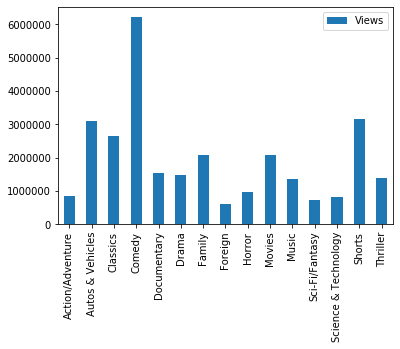

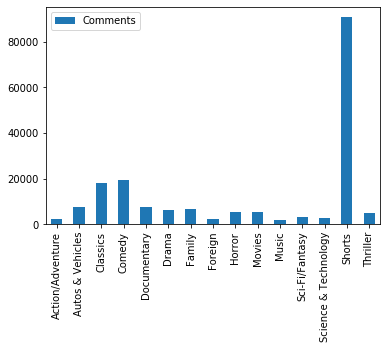

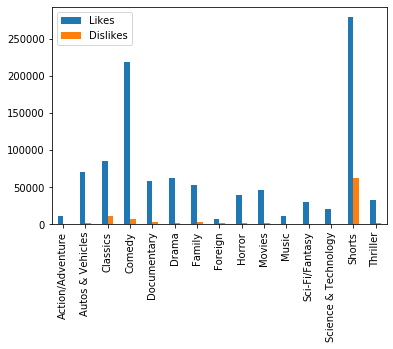

In [10]:
# This part sums main part in the first part 
# make the 'stats' for each object
views_stats = us_video_all.groupby("category_name")["views"].mean()
likes_stats = us_video_all.groupby("category_name")["likes"].mean()
dislikes_stats = us_video_all.groupby("category_name")["dislikes"].mean()
comment_stats = us_video_all.groupby("category_name")["comment_count"].mean()

# make them to lists so as to use pandas dataframe to plot
views_stats = views_stats.tolist()
likes_stats = likes_stats.tolist()
dislikes_stats = dislikes_stats.tolist()
comment_stats = comment_stats.tolist()

# The plot of the 'views' and 'comments'
view_df = pd.DataFrame({'Views': views_stats,}, index = cate_list)
comment_df = pd.DataFrame({'Comments': comment_stats}, index = cate_list)

ax = view_df.plot.bar(rot=90)
ax = comment_df.plot.bar(rot=90)

# The plot of 'likes' and 'dislikes' (deliberately put together to see the difference)
df = pd.DataFrame({'Likes': likes_stats,
                   'Dislikes': dislikes_stats}, index = cate_list)
ax = df.plot.bar(rot=90)

From the first scan, we can see the category that gets the average most views is 'Comedy', but not as what I thought that higher views make higher comments, the true is the category that gets the average most comments is 'Shorts' and people give more tag of 'like' or 'dislike' on the two category. It is an interesting start and I think there must be something behind it.

#### Pie with bar of Reviews by choosing diffierent category

In [11]:
# interaction part 
@ipywidgets.interact(category=cate_list)
def review_by_category(category):
    # create the sum of each variables 
    like_count = us_video_all[us_video_all['category_name']==category]['likes'].sum() 
    dislike_count = us_video_all[us_video_all['category_name']==category]['dislikes'].sum() 
    comment_count = us_video_all[us_video_all['category_name']==category]['comment_count'].sum() 
    view_count = us_video_all[us_video_all['category_name']==category]['views'].sum()

    # create two plot in a layer
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    
    # Show the total view to give more information
    print("\n The total view is {}".format(int(view_count)))
    
    # Set of labels, colors for pie chart, sizes
    label = ['Likes', 'Dislikes', 'Comments']
    colors = ['lightcoral', 'yellowgreen', 'gold']
    sizes = [like_count,dislike_count,comment_count]

    # Pie chart, where the slices will be ordered
    ax[0].pie(sizes, labels=label, autopct='%1.1f%%', colors=colors, startangle=90)
    ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # bar chart
    ax[1].bar(label, sizes, color = 'DarkOrange')

    # show the plot
    plt.show()

interactive(children=(Dropdown(description='category', options=('Action/Adventure', 'Autos & Vehicles', 'Class…

From this part, we can clear see the review variables(likes, dislikes, views, comments) in different categories. We can easily find that Likes is always the most among 'likes, dislikes and comments'. Different category has different number and occupation of these variables, for example, the 'comedy' has 88.9% likes while the 'shorts' has only 64.6%, the 'Foreign' has 21.3% comments while the 'Comedy' only has 7.9% comments. 

#### Heatmap of correlation bewtween possible review variables

In [12]:
# interactive plot
@ipywidgets.interact(category=cate_list)
def corr_heatmap(category):
    # extract some columns for use
    corr_df = us_video_all[us_video_all['category_name'] == category].loc[:,['views', 'likes', 'dislikes', 'comment_count']]

    # plot
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.heatmap(corr_df.corr(), annot = True, cmap= 'Paired', linewidths=1, 
                square=True, linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') # do some beautification
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

    # solve the problem of broken sns heatmap
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


interactive(children=(Dropdown(description='category', options=('Action/Adventure', 'Autos & Vehicles', 'Class…

From this part, we can get the correlation of each two columns in a certain apoointed category, this can be preparation for deep analysis of the dataset, which is really clear. For example, we can see 'likes' has positive correlation with others except 'trending_days'. There is still a lot to discover.

### Other discover 

#### Heatmap of the trending duration

Text(0.5, 1, 'Category and Trending Duration in United States')

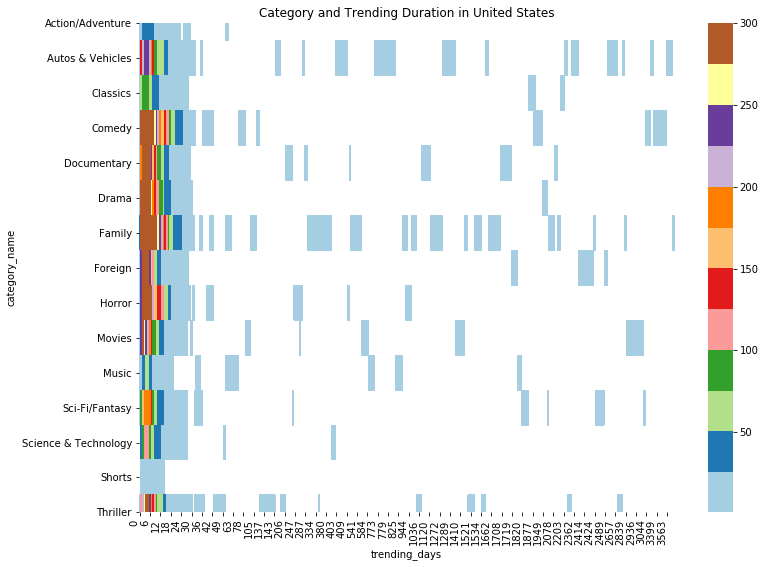

In [13]:
# make sure two date columns are date type
us_videos['trending_date'] = pd.to_datetime(us_videos['trending_date'], errors='coerce', format='%y-%m-%d')
us_videos['publish_date'] = pd.to_datetime(us_videos['publish_date'], errors='coerce', format='%y-%m-%d')

# do subtraction of the two dates and return different days in new column'trending_days'
us_video_all['trending_days'] = (us_video_all['trending_date'].astype('<M8[ns]')-us_video_all['publish_date'].astype('<M8[ns]')).dt.days

#us_video_all.head()

# preprocess the data for plot
cate_trend_duration= us_video_all.groupby(['category_name','trending_days']).count()['video_id'].unstack().clip(upper=300)

# plot and set the axis and tile
plt.figure(figsize=(12,9))
ax = sns.heatmap(cate_trend_duration, cmap='Paired')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Category and Trending Duration in United States")

From this part, we add a new column 'trending_days' to record the difference days between 'publish_date' and 'trending_date' so that we can discover the trending duration distribution of the dataset. And I choose to show it using the category as 'y' axis. It looks nice but not very rich maybe because the data is not big enough cause it is just the video data of United States, I think it would be more beautiful when using the world data.

#### Replot the heatmap in part 3.2 when adding the column 'trending_days'

In [14]:
# Above correlation heatmap adding the column 'trending_days'
# interactive plot
@ipywidgets.interact(category=cate_list)
def corr_heatmap(category):
    # extract some columns for use
    corr_df = us_video_all[us_video_all['category_name'] == category].loc[:,['views', 'likes', 'dislikes', 'comment_count', 'trending_days']]

    # plot
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.heatmap(corr_df.corr(), annot = True, cmap= 'Paired', linewidths=1, 
                square=True, linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') # do some beautification
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

    # solve the problem of broken sns heatmap
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

interactive(children=(Dropdown(description='category', options=('Action/Adventure', 'Autos & Vehicles', 'Class…

Though the plot seems to be more coloful and rich, but the column 'trending_days' actually has no remarkable relationship with other variables.

## Conlusion

From the top to the end, it seems not complex to show but there are quite a lot of work to do. I think I have done a good discover on different dimensions of the dataset. Meanwhile, I show various styles of plot to add the readability and detailed comment within the notebook. 

However, there are still a lot to improve, if given more time, I would include more related dataset and do more interactions. The interactions here I have done seem to be a little similar because I haven't found other ways to show the limitation of the data fot interaction. To conlude, I will keep going.